This notebook contains code to visualize joint method validation using a line graph

In [10]:
%pylab inline
import glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/figure1/'

Populating the interactive namespace from numpy and matplotlib


In [11]:
def main():
    
    means = [10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1]#10**-7 
    pers = [2,3,4]
    opt_dic = {}
    opt_dic[2] = [11,20]
    opt_dic[3] = [5,13]
    opt_dic[4] = [7,10]
    color_list = ['deepskyblue','blue','lightgreen','green','lightpink','deeppink','C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
    plot_med = False
    folder = 't1'
    fig_num = 0
    fig_num = fig_num + 1
    color_num = -1
    
    mut_params_dic = {}
    mut_params_dic[(3,5)] = 'Mu=10^-5.5, p=0.9, L=0.33'
    mut_params_dic[(3,13)] = 'Mu=10^-3, p=0.9, L=0.33'
    mut_params_dic[(2,11)] = 'Mu=10^-4.25, p=0.6, L=0.15'
    mut_params_dic[(2,20)] = 'Mu=10^-3, p=0.6, L=0.15'
    mut_params_dic[(4,7)] = 'Mu=10^-4.2, p=0.9, L=0.45'
    mut_params_dic[(4,10)] = 'Mu=10^-3, p=0.9, L=0.45'
    
    for per in pers:
        for opt in opt_dic[per]:
            color_num = color_num + 1
            list_of_mean = []
            list_of_med_of_med = []
            errors = []
            legend_labels = []

            for mean in means:
                for j in range(0,3):

                    file_list = glob.glob('/gymreklab-tscc/bonnieh/heatmap/results_validation_ks_test/%s/per_%d_opt_%d_*eurodem_prior2*_%.8f.txt'%(folder, per, opt, mean)) 
                    file_list.sort()
                       
                    filename = file_list[j]
                        
                    allele_freqs_file = open(filename, 'r')
                    lines = allele_freqs_file.readlines()

                    # Line 4 is mean of medians
                    line = lines[4]       
                    info = line.strip().split(': ')
                    est_mean = float(info[1])
                    list_of_mean.append(est_mean)
                    
                    # Line 5 is standard deviation
                    line = lines[5]       
                    info = line.strip().split(': ')
                    stdev = float(info[1])
                    
                    # Line 6 is list of accepted medians
                    line = lines[6]       
                    info = line.strip().split(': ')
                    if len(info) > 1: 
                        params = info[1]
                        params = params.strip().split('), ')
                        params_list = []
                        list_of_med = [] 
                        for param in params:
                            param = param[1:]
                            if param[-1] == ')':
                                param = param[:-1]
                            param = param.strip().split(', ')
                            params_list.append(((float(param[1])), float(param[2])))
                            list_of_med.append(float(param[0]))
                        list_of_med_of_med.append(np.median(list_of_med))

                        # Line 1 is information of k, theta used
                        line = lines[1]
                        info = line.strip().split(' ')
                        k = float(info[7])
                        theta = float(info[10])
                        #legend_labels.append('(%.1E,%.1E)'%(k,theta))
                        legend_labels.append(str(k))
                        errors.append(stdev)
                    else:
                        print(filename)
            
            plt.figure(fig_num, figsize=(12, 6)) 
            #legend_labels = np.arange(1,13)
            y_pos = np.arange(len(legend_labels))
            if plot_med == True:
                plt.errorbar(y_pos[0:3], list_of_med_of_med[0:3], marker = 'o', ls = '--', c=color_list[color_num], label = 'Per %d Opt %d'%(per, opt))#mut_params_dic[(per,opt)])# 
                plt.errorbar(y_pos[3:6], list_of_med_of_med[3:6],  marker = 'o', ls = '--' , c=color_list[color_num]) 
                plt.errorbar(y_pos[6:9], list_of_med_of_med[6:9],  marker = 'o', ls = '--' , c=color_list[color_num]) 
                plt.errorbar(y_pos[9:12], list_of_med_of_med[9:12],  marker = 'o', ls = '--', c=color_list[color_num])
                plt.errorbar(y_pos[12:15], list_of_med_of_med[12:15],  marker = 'o', ls = '--', c=color_list[color_num])
                plt.errorbar(y_pos[15:18], list_of_med_of_med[15:18],  marker = 'o', ls = '--', c=color_list[color_num])
                #plt.errorbar(y_pos[18:21], list_of_med_of_med[18:21],  marker = 'o', ls = '--', c=color_list[color_num])
                plt.title('Joint method validation: \nMedian of 20 median estimates',size=15)
            else:
                plt.errorbar(y_pos[0:3], list_of_mean[0:3], marker = 'o', ls = '--', c=color_list[color_num], label = 'Per %d Opt %d'%(per, opt)) #mut_params_dic[(per,opt)])#'Per %d Opt %d'%(per, opt)) 
                plt.errorbar(y_pos[3:6], list_of_mean[3:6],  marker = 'o', ls = '--' , c=color_list[color_num]) 
                plt.errorbar(y_pos[6:9], list_of_mean[6:9],  marker = 'o', ls = '--' , c=color_list[color_num]) 
                plt.errorbar(y_pos[9:12], list_of_mean[9:12],  marker = 'o', ls = '--', c=color_list[color_num])
                plt.errorbar(y_pos[12:15], list_of_mean[12:15],  marker = 'o', ls = '--' , c=color_list[color_num]) 
                plt.errorbar(y_pos[15:18], list_of_mean[15:18],  marker = 'o', ls = '--' , c=color_list[color_num]) 
                #plt.errorbar(y_pos[18:21], list_of_mean[18:21],  marker = 'o', ls = '--', c=color_list[color_num]) 
                plt.title('Joint method validation: \nMean of 20 median estimates',size=15)
            plt.xticks(y_pos[0:18], legend_labels[0:18], rotation = 35, size=15) 
            
    plt.yscale('log')
    plt.ylabel("Estimated mean s",size=15)
    plt.yticks(size=15)
    plt.axvline(x=2.5, linestyle = '--',c='black')
    plt.axvline(x=5.5, linestyle = '--',c='black')
    plt.axvline(x=8.5, linestyle = '--',c='black')
    plt.axvline(x=11.5, linestyle = '--',c='black')
    plt.axvline(x=14.5, linestyle = '--',c='black')
    #plt.axvline(x=17.5, linestyle = '--',c='black')
    text_pos = 10**-8
    plt.text(-0.3,text_pos,'Mean s=' + r'$10^{-6}$',size=15)
    plt.text(3,text_pos,'Mean s=' + r'$10^{-5}$',size=15)
    plt.text(6,text_pos,'Mean s=' + r'$10^{-4}$',size=15)
    plt.text(9,text_pos,'Mean s=' + r'$10^{-3}$',size=15)
    plt.text(12,text_pos,'Mean s=' + r'$10^{-2}$',size=15)
    plt.text(15,text_pos,'Mean s=' + r'$10^{-1}$',size=15)
    #plt.text(18,10**-9.5,'Mean s=' + r'$10^{-1}$',size=11)
    plt.text(2.7,10**-7.5,'Value of ground truth gamma distribution parameter a',size=15)
    #plt.text(0.2,10**-7,'Mean s=' + r'$10^{-5}$',size=15)
    #plt.text(3.2,10**-7,'Mean s=' + r'$10^{-4}$',size=15)
    #plt.text(6.2,10**-7,'Mean s=' + r'$10^{-3}$',size=15)
    #plt.text(9.2,10**-7,'Mean s=' + r'$10^{-2}$',size=15)
    #plt.text(3.9,10**-6.7,'Ground truth a,b setting',size=15)
    '''
    plt.text(0.7,10**-7.7,r'$s=10^{-5}$',size=15)
    plt.text(3.7,10**-7.7,r'$s=10^{-4}$',size=15)
    plt.text(6.7,10**-7.7,r'$s=10^{-3}$',size=15)
    plt.text(9.7,10**-7.7,r'$s=10^{-2}$',size=15)
    
    '''
    plt.plot(1, 10**-6, marker='*', markersize=20, c = 'black', zorder=10) 
    plt.plot(4, 10**-5, marker='*', markersize=20, c = 'black', zorder=10) 
    plt.plot(7, 10**-4, marker='*', markersize=20, c = 'black', zorder=10) 
    plt.plot(10, 10**-3, marker='*', markersize=20, c = 'black', zorder=10) 
    plt.plot(13, 10**-2, marker='*', markersize=20, c = 'black', zorder=10) 
    plt.plot(16, 10**-1, marker='*', markersize=20, c = 'black', zorder=10) 
    plt.ylim(10**-6.5, 10**-0.5)
    plt.legend()
    plt.savefig(PLOTDIR + 'validation_line_graph_extended.pdf',bbox_inches='tight')

CPU times: user 1.44 s, sys: 35.4 ms, total: 1.48 s
Wall time: 1.65 s


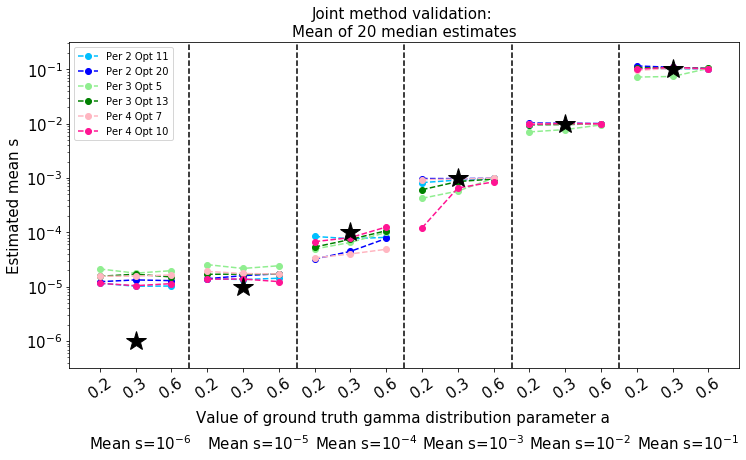

In [12]:
%%time
if __name__ == '__main__':
    main()